In [1]:
import networkx as nx
import geopandas as gpd
import numpy as np

import pandas as pd
from pandas import DataFrame
from pandas import read_excel, merge

%matplotlib inline
import matplotlib.pyplot as plt

import matplotlib.cm as cm
from matplotlib.lines import Line2D
import matplotlib.colors as colors

from shapely.geometry import Point

# import sys
# sys.path.append("C:/Users/a/Anaconda/envs/ox/lib/site-packages/")
# import pandana as pdna
# from pandana.loaders import osm
# %matplotlib inline
# import pandana, matplotlib.pyplot as plt

# from sklearn.datasets import make_blobs
# from sklearn.cluster import KMeans
# from scipy.stats import entropy

# import sys
# sys.path.append("C:/Users/a/Anaconda/Lib/site-packages/")
# import openpyxl
# import xlsxwriter
# import momepy

from IPython.display import Image

# import sys
# sys.path.append("C:/Users/Hsiao/.conda/envs/Tensorflow-GPU/Lib/site-packages/")
import osmnx as ox
ox.config(log_file=True, log_console=True, use_cache=True)
ox.__version__

'0.15.1'

In [2]:
# ===== configure the inline image display
img_folder = "images"
extension = "png"
size = 240

# ===== specify that we're retrieving building footprint geometries
tags = {"building": True}

#=====3 ways to retrieve data within city limits
query = {'city': 'Braunschweig'} ##https://stackoverflow.com/questions/65064351/python-osmnx-how-to-download-a-city-district-map-from-openstreetmap-based-on-t
cities = ['Braunschweig']
place_name = "Rostock,Germany"

# 1. Getting building footprints within the city limits
#https://github.com/gboeing/osmnx-examples/blob/main/notebooks/10-building-footprints.ipynb

#http://darribas.org/gds4ae/content/notebooks/06-OpenStreetMap.html

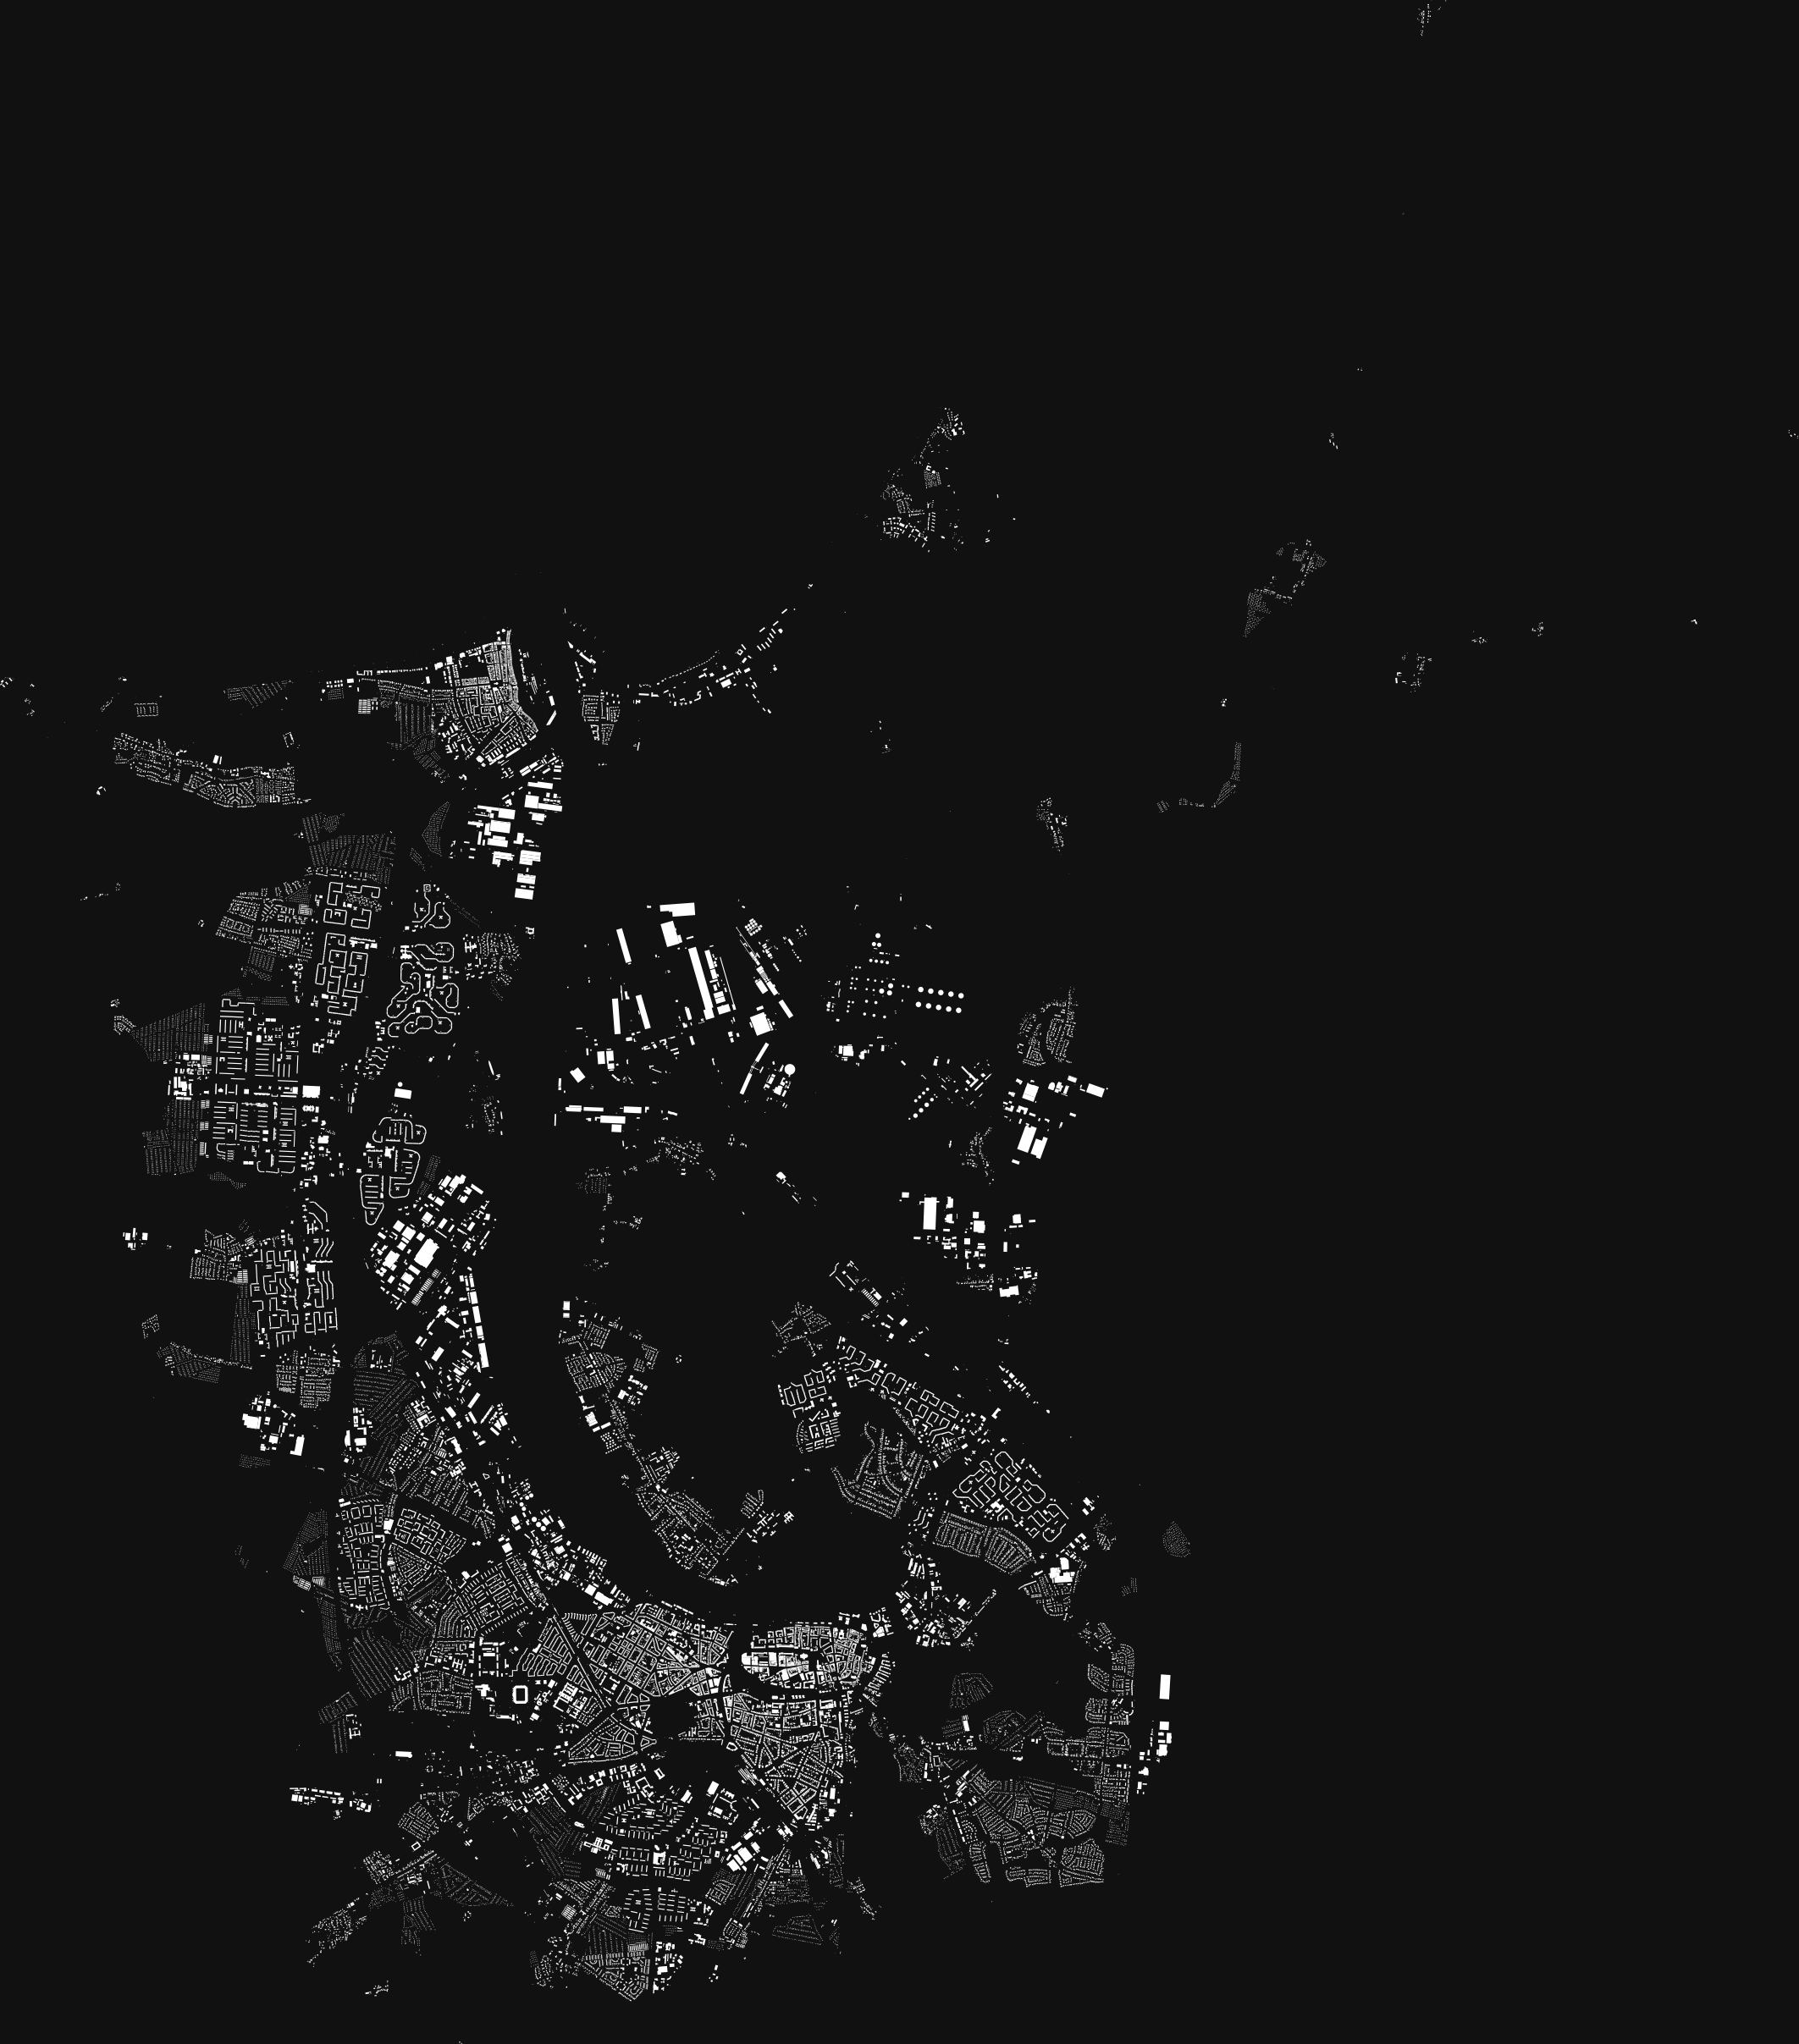

In [6]:
gdf = ox.footprints_from_place(place=place_name) # For 0.15.1 version
# gdf = ox.geometries_from_place(place_name, tags) # For 1.1.1 version 

gdf_proj = ox.project_gdf(gdf)
fp = f"./{img_folder}/piedmont_bldgs.{extension}"
fig, ax = ox.plot_footprints(gdf_proj, filepath=fp, dpi=400, save=True, show=False, close=True, color="w")
Image(fp, height=size, width=size)

In [ ]:
#  ===== Getting building footprint one and a half square kilometers near a point

point = (48.873446, 2.294255)
dist = 612

gdf = ox.geometries_from_point(point, tags, dist=dist)
gdf_proj = ox.project_gdf(gdf)
bbox = ox.utils_geo.bbox_from_point(point=point, dist=dist, project_utm=True)
fp = f"./{img_folder}/paris_bldgs.{extension}"
fig, ax = ox.plot_footprints(
    gdf_proj,
    bbox=bbox,
    color="w",
    filepath=fp,
    dpi=90,
    save=True,
    show=False,
    close=True,
)
Image(fp, height=size, width=size)

# 2. Get coordinates of centroids of all buildings
#https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.html

In [24]:
gdf

,nodes,addr:city,addr:country,addr:housename,addr:housenumber,addr:postcode,addr:street,building,building:levels,building:material,...,width,min_level,contact:mobil,garage,members,brothel:eros_center,brothel:escort_services,kvl_desc,insurance,blind:description:de
24774486,"[269209624, 269209626, 269209627, 5481897091, ...",Rostock,DE,Hafenterrassen,58,18057,Warnowufer,office,4,glass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26465286,"[290024433, 6247475702, 6247475703, 290024436,...",NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32125665,"[360620455, 360620456, 360620457, 360620458, 3...",NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32212284,"[361221236, 361221237, 361221238, 361221241, 3...",NaN,NaN,NaN,NaN,NaN,NaN,retail,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32212285,"[361221242, 2152739646, 361221245, 361221268, ...",Rostock,DE,NaN,3,18119,Am Yachthafen,hotel,3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11065122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,roof,NaN,NaN,...,NaN,NaN,NaN,NaN,"{760728075: 'outer', 799480721: 'inner'}",NaN,NaN,NaN,NaN,NaN
12527587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,hospital,4,NaN,...,NaN,NaN,NaN,NaN,"{882019684: 'inner', 882019685: 'inner', 88201...",NaN,NaN,NaN,NaN,NaN
13188576,NaN,NaN,NaN,NaN,NaN,NaN,NaN,public,2,NaN,...,NaN,NaN,NaN,NaN,"{981370267: 'inner', 981370268: 'inner', 33852...",NaN,NaN,NaN,NaN,NaN
13188577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,public,2,NaN,...,NaN,NaN,NaN,NaN,"{981370265: 'inner', 981370266: 'inner', 33852...",NaN,NaN,NaN,NaN,NaN


In [25]:
# ===== Building attributes
gdf.columns

Index(['nodes', 'addr:city', 'addr:country', 'addr:housename',
       'addr:housenumber', 'addr:postcode', 'addr:street', 'building',
       'building:levels', 'building:material',
       ...
       'width', 'min_level', 'contact:mobil', 'garage', 'members',
       'brothel:eros_center', 'brothel:escort_services', 'kvl_desc',
       'insurance', 'blind:description:de'],
      dtype='object', length=386)

In [23]:
# ===== Coordinates of all buildings
gdf['geometry']

24774486    POLYGON ((12.11851 54.09354, 12.11863 54.09370...
26465286    POLYGON ((12.12871 54.18291, 12.12857 54.18284...
32125665    POLYGON ((12.09209 54.07697, 12.09207 54.07702...
32212284    POLYGON ((12.09784 54.17674, 12.09788 54.17674...
32212285    POLYGON ((12.09572 54.18097, 12.09578 54.18090...
                                  ...                        
11065122    POLYGON ((12.09427 54.17466, 12.09447 54.17429...
12527587    POLYGON ((12.10128 54.08543, 12.10150 54.08537...
13188576    POLYGON ((12.12536 54.06489, 12.12529 54.06489...
13188577    POLYGON ((12.12418 54.06474, 12.12418 54.06475...
13188578    POLYGON ((12.12339 54.06476, 12.12340 54.06488...
Name: geometry, Length: 52856, dtype: geometry

In [43]:
# ===== Get coordinates of centroids of all buildings
gdf.centroid

<ipython-input-43-97276e8871cf>:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  type(gdf.centroid)
<ipython-input-43-97276e8871cf>:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf.centroid


24774486    POINT (12.11843 54.09366)
26465286    POINT (12.12868 54.18268)
32125665    POINT (12.09196 54.07698)
32212284    POINT (12.09786 54.17673)
32212285    POINT (12.09625 54.18058)
                      ...            
11065122    POINT (12.09374 54.17382)
12527587    POINT (12.10215 54.08498)
13188576    POINT (12.12546 54.06506)
13188577    POINT (12.12449 54.06480)
13188578    POINT (12.12375 54.06482)
Length: 52856, dtype: geometry

In [44]:
type(gdf.centroid)

<ipython-input-44-672cda6d8c5e>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  type(gdf.centroid)


geopandas.geoseries.GeoSeries

In [60]:
dir(gdf.centroid)

<ipython-input-60-dea8318c49bb>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dir(gdf.centroid)


['T',
 '_AXIS_ALIASES',
 '_AXIS_IALIASES',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__geo_interface__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__long__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '

In [67]:
gdf.centroid.keys(), gdf.centroid.keys()[0], gdf.centroid.values

<ipython-input-67-904bb6b3a53e>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf.centroid.keys(), gdf.centroid.keys()[0], gdf.centroid.values


(Int64Index([24774486, 26465286, 32125665, 32212284, 32212285, 32236485,
             32777729, 33436762, 33436763, 33436764,
             ...
              4460620,  5462561,  5469199,  8322523,  8885261, 11065122,
             12527587, 13188576, 13188577, 13188578],
            dtype='int64', length=52856),
 24774486,
 <GeometryArray>
  ...
 Length: 52856, dtype: geometry)

In [71]:
gdf.centroid.x

<ipython-input-71-2aa1fec71aa6>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf.centroid.x


24774486    12.118435
26465286    12.128682
32125665    12.091955
32212284    12.097858
32212285    12.096245
              ...    
11065122    12.093738
12527587    12.102154
13188576    12.125463
13188577    12.124494
13188578    12.123752
Length: 52856, dtype: float64

In [75]:
list_x = gdf.centroid.x
list_y = gdf.centroid.y
# all_coords = zip(list_x, list_y) 
# zipped_list = list(all_coords)
# zipped_list

<ipython-input-75-960d95cb5351>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  list_x = gdf.centroid.x
<ipython-input-75-960d95cb5351>:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  list_y = gdf.centroid.y


[(12.118434609371937, 54.09365594756348),
 (12.128682191928569, 54.18268108292634),
 (12.0919553, 54.076979400000006),
 (12.097858496889987, 54.176734727831914),
 (12.096245158514945, 54.180576334707425),
 (12.07719816270276, 54.142369565648316),
 (12.168269920892694, 54.1234154439573),
 (12.147847645058562, 54.08894682577706),
 (12.148422688566693, 54.09034794989488),
 (12.147109568880524, 54.08744970860659),
 (12.148407133274233, 54.09021833949692),
 (12.148294059476468, 54.08839737039014),
 (12.148461432778278, 54.090458148126594),
 (12.148436957031773, 54.08837945306656),
 (12.14843876874248, 54.09039633956637),
 (12.147298539286089, 54.08866966922347),
 (12.145877509864926, 54.08964808146243),
 (12.147097238413599, 54.088553860960346),
 (12.148477830565348, 54.090534197398725),
 (12.147296194824994, 54.088561525344325),
 (12.147887150999509, 54.08974091516284),
 (12.144147284228634, 54.088207572995444),
 (12.147772295017253, 54.08941409418433),
 (12.14765504135762, 54.088658214564

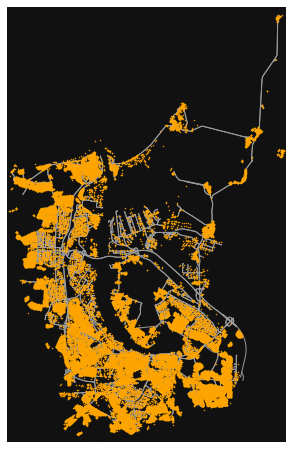

In [87]:
# ===== plot network
G_plot = ox.graph_from_place(place_name, network_type='drive')
fig, ax = ox.plot_graph(G_plot, node_color='#aaaaaa', node_size=1, show=False, close=True)

# ===== plot building
# fig, ax = ox.plot_footprints(gdf_proj, filepath=fp, dpi=400, save=True, show=False, close=True, color="w")

# ===== plot buildind centroid
ax.scatter(x = list_x, y = list_y, c='orange', marker='.', s=1, zorder=3)

# fig.canvas.draw()
fig

# 3. Find nearest building

# 4. Calculate distance between buildings & create distance matrix
https://stackoverflow.com/questions/19412462/getting-distance-between-two-points-based-on-latitude-longitude
https://stackoverflow.com/questions/65142900/distance-between-buildings

In [99]:
# ====== 1st way to calculate distance between POINT
import math

def distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d


if __name__ == '__main__':
    import doctest
    doctest.testmod()
    
# ====== 2nd way to calculate distance between POINT
# from math import sin, cos, sqrt, atan2, radians

# R = 6373.0  # approximate radius of earth in km

# lat1 = radians(52.2296756)
# lon1 = radians(21.0122287)
# lat2 = radians(52.406374)
# lon2 = radians(16.9251681)

# dlon = lon2 - lon1
# dlat = lat2 - lat1

# a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
# c = 2 * atan2(sqrt(a), sqrt(1 - a))

# distance = R * c

# print("Result:", distance)
# print("Should be:", 278.546, "km")

In [102]:
origin = (48.1372, 11.5756)  # Munich
destination = (52.5186, 13.4083)  # Berlin
distance(origin, destination)

504.21571518252625

In [91]:
from scipy.sparse import csr_matrix
from scipy.spatial.distance import squareform, pdist
from sklearn.cluster import DBSCAN

In [92]:
# create a euclidean distance vector between the nodes to quickly find nearby nodes within some distance threshold
# x = nodes_unique.map(lambda x: G.nodes[x]['x'])
# y = nodes_unique.map(lambda x: G.nodes[x]['y'])
x = list_x
y = list_y
df = pd.DataFrame({'x':x, 'y':y}) #, index=nodes_unique)
dist_matrix = squareform(pdist(X=df, metric='euclidean'))
df_dist_matrix = pd.DataFrame(data=dist_matrix, columns=df.index.values, index=df.index.values)
node_euclidean_dists = df_dist_matrix.stack()

MemoryError: Unable to allocate 10.4 GiB for an array with shape (1396851940,) and data type float64

# 5. Cluster buildings into TOPOIS

In [103]:
# parameterize DBSCAN
eps = 2000 #meters
minpts = 8 #smallest cluster size allowed
eps / 3671000

0.0005448106782892945

In [104]:
%%time
#===== compute DBSCAN using straight-line haversine distances
eps_rad = eps / 3671000. #meters to radians
db = DBSCAN(eps=eps_rad, min_samples=minpts, metric='haversine', algorithm='ball_tree')

Wall time: 999 µs


In [118]:
firms = pd.DataFrame({'x':gdf.centroid.x, 'y':gdf.centroid.y})
len(firms)

<ipython-input-118-c0cb28618aa8>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  firms = pd.DataFrame({'x':gdf.centroid.x, 'y':gdf.centroid.y})


52856

In [119]:
firms['spatial_cluster'] = db.fit_predict(firms[['y', 'x']])
len(firms['spatial_cluster'].unique()) #Number of TOPOIS

237

In [144]:
firms['spatial_cluster'].value_counts()

-1      6121
 70     4488
 30     2782
 27     2752
 112    2331
        ... 
 79        7
 234       6
 226       6
 162       5
 144       5
Name: spatial_cluster, Length: 237, dtype: int64

In [145]:
firms_2 = firms.iloc[52756:52856]
firms_2

,x,y,spatial_cluster
1006353338,12.097111,54.095110,154
1008698946,12.113122,54.104512,6
1008698947,12.113098,54.104381,6
1008698948,12.112529,54.104242,6
1008698949,12.112491,54.104302,6
...,...,...,...
11065122,12.093738,54.173822,-1
12527587,12.102154,54.084976,-1
13188576,12.125463,54.065057,-1
13188577,12.124494,54.064802,-1


In [113]:
#===========List of color
import matplotlib._color_data as mcd
import matplotlib.patches as mpatch

# print(type(mcd.CSS4_COLORS))
# mcd.CSS4_COLORS.values
color_values=[]
for value in mcd.CSS4_COLORS.values():
    color_values.append(value)
color_values[0], len(color_values)

# point_colors = [color_values[c] for c in firms['spatial_cluster']]
# color_map = {-1: 'r', 0:'g', 1:'b', 2:'r', 3:'b', 4:'g', 5:'r', 6:'m', 7:'b', 8:'g', 9:'r', 10:'m', 11:'b', 12:'g', 13:'r', 14:'m', 15:'b', 16:'g', 17:'r', 18:'m'}
# ====https://stackoverflow.com/questions/14720331/how-to-generate-random-colors-in-matplotlib
# from itertools import cycle
# cycol = cycle('bgrcmk')

('#F0F8FF', 148)

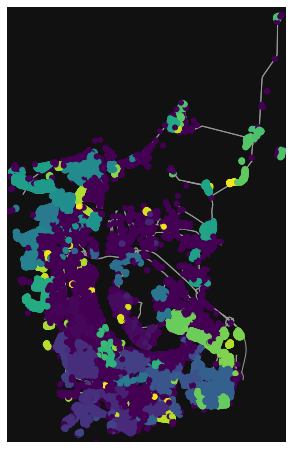

In [155]:
# ===== plot firms by cluster

fig, ax = ox.plot_graph(G_plot, node_size=0, show=False, close=True)
ax.scatter(x=firms['x'], y=firms['y'], 
           c= firms['spatial_cluster'], #https://www.statology.org/matplotlib-scatterplot-color-by-value/
           marker='.', s=100, zorder=3)
fig.canvas.draw()
fig

# 6. Cluster TOPOIs